<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Capstone/Capstone_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## Problem Definition


This project aims to analyze business registration data to understand various aspects of businesses, including their operational status, duration, and types. The cleaned and processed data can be utilized for further analysis, such as identifying potential locations for Electric Vehicle (EV) charging stations by considering active businesses and their geographical distribution.

*   **Business Problem:** The primary business problem is to gain insights from raw business registration data, which often contains inconsistencies and requires processing to be useful for analytical purposes. Specifically, there's a need to standardize business statuses, calculate business operational durations, and clean categorical business type information.
*    **Data Science Problem:** This is primarily a **data cleaning and feature engineering** problem. It involves transforming raw, unstructured, or inconsistent data into a clean and structured format suitable for analysis. While not directly a supervised/unsupervised problem at this stage, the cleaned data would be a prerequisite for various downstream supervised (e.g., predicting business success/failure) or unsupervised (e.g., clustering businesses by type or location) tasks.

## Data Collection/Sources


In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
!curl -O https://data.cabq.gov/business/busregistration/BusinessRegistrationCABQ-en-us.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61.1M  100 61.1M    0     0   980k      0  0:01:03  0:01:03 --:--:-- 1050k


In [3]:
!ls -la BusinessRegistrationCABQ-en-us.csv

-rw-r--r-- 1 root root 64145312 Jul 30 18:36 BusinessRegistrationCABQ-en-us.csv


In [4]:
!head BusinessRegistrationCABQ-en-us.csv

��R E G I S T R A T I O N N U M 	 T Y P E 	 T Y P E A B B R E V I A T I O N 	 S T A T U S 	 E F F E C T I V E S T A T U S 	 O W N E D B Y 	 L E G A L N A M E 	 D O I N G B U S I N E S S A S 	 B U S I N E S S D E S C R I P T I O N 	 C O N T A C T N A M E 	 P R I M A R Y P H O N E 	 B U S I N E S S L O C A T I O N 	 S T R E E T _ N U M B E R 	 S T R E E T _ N A M E 	 S T R E E T _ D I R E C T I O N 	 S T R E E T _ T Y P E 	 P O S T _ D I R E C T I O N 	 C I T Y 	 S T A T E 	 Z I P 	 O R I G N A L I S S U E D A T E 	 M O S T R E C E N T I S S U E D A T E 	 E X P I R A T I O N D A T E 	 N A I C S C O D E 	 N A I C S C O D E S E C T O R 	 F I L E E X P O R T D A T E 
 
 " 	 E S T R A D A   D E V E L O P M E N T   L L C 	 	 C O N S T R U C T I O N   	 E S T R A D A   D E V E L O P M E N T   L L C   	 5 0 5 4 5 0 9 8 8 8 	 5 3 5   M U S C A T E L   N E   	   	   	   	   	   	   	   	   	 0 8 / 0 9 / 2 0 1 8 	 0 8 / 0 8 / 2 0 2 4 	 0 8 / 0 8 / 2 0 2 5 	 2 3 	 C o n s t r u c t i o n 	 2 0 2 4 

In [5]:
!file BusinessRegistrationCABQ-en-us.csv

BusinessRegistrationCABQ-en-us.csv: Unicode text, UTF-16, little-endian text, with very long lines (334), with CRLF, LF line terminators


In [6]:
df = pd.read_csv('BusinessRegistrationCABQ-en-us.csv', encoding='UTF-16', sep = '\t', dtype='str')

In [7]:
df.shape #(108550, 26)

(108550, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 0 to 108549
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   REGISTRATIONNUM      108550 non-null  object
 1   TYPE                 108550 non-null  object
 2   TYPEABBREVIATION     108550 non-null  object
 3   STATUS               108550 non-null  object
 4   EFFECTIVESTATUS      108550 non-null  object
 5   OWNEDBY              108536 non-null  object
 6   LEGALNAME            108550 non-null  object
 7   DOINGBUSINESSAS      96630 non-null   object
 8   BUSINESSDESCRIPTION  77879 non-null   object
 9   CONTACTNAME          108550 non-null  object
 10  PRIMARYPHONE         108546 non-null  object
 11  BUSINESSLOCATION     108550 non-null  object
 12  STREET_NUMBER        108550 non-null  object
 13  STREET_NAME          108550 non-null  object
 14  STREET_DIRECTION     108550 non-null  object
 15  STREET_TYPE          108550 non-nu

In [9]:
df

,REGISTRATIONNUM,TYPE,TYPEABBREVIATION,STATUS,EFFECTIVESTATUS,OWNEDBY,LEGALNAME,DOINGBUSINESSAS,BUSINESSDESCRIPTION,CONTACTNAME,...,POST_DIRECTION,CITY,STATE,ZIP,ORIGNALISSUEDATE,MOSTRECENTISSUEDATE,EXPIRATIONDATE,NAICSCODE,NAICSCODESECTOR,FILEEXPORTDATE
0,HB-2018-351082,Home Business,HB,Active,Active,ESTRADA DEVELOPMENT LLC \r\n,ESTRADA DEVELOPMENT LLC,NaN,CONSTRUCTION,ESTRADA DEVELOPMENT LLC,...,,,,,08/09/2018,08/08/2024,08/08/2025,23,Construction,2024-10-13 03:09:45
1,HB-2018-351169,Home Business,HB,Expired,Expired,JANEYCE MICHEL CAPITO \r\n,JANEYCE MICHEL CUPITO,JANEYCE MICHEL CUPITO,NaN,JANEYCE MICHEL CUPITO,...,,,,,08/15/2018,08/15/2018,08/14/2019,81,Other Services (except Public Administration),2024-10-13 03:09:46
2,HB-2019-354407,Home Business,HB,Expired,Expired,DAVID B ZAMORA \r\n,DAVID B ZAMORA,SECOND GLANCE ROCKS AND JEWELRY,HANDMADE JEWELRY,DAVID ZAMORA,...,,,,,04/05/2019,04/05/2019,04/04/2020,454,Retail Trade,2024-10-13 03:09:46
3,COM-2021-364438,Commercial,COM,Expired,Expired,PERKY PRESS PRINTING INC \r\n,PERKY PRESS PRINTING INC,PERKY PRESS PRINTING,PRINTING CO,JAMES,...,,,,,04/28/2021,04/28/2021,04/27/2022,541,"Professional, Scientific, and Technical Services",2024-10-13 03:09:48
4,COM-2022-370103,Commercial,COM,Closed,Closed,SARA \r\n,HOLLYWOOD EYEBROW THREADING LLC,HOLLYWOOD EYEBROW THREADING LLC,NaN,SARA AMIRI,...,,,,,05/20/2022,05/31/2023,05/19/2024,81,Other Services (except Public Administration),2024-10-13 03:09:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108545,TMP-2024-383187,Temporary Registration,TMP,Expired,Expired,victor raul postillon \r\n,VICTOR R POSTILLON,PERUVIAN INKAS ART,Clothing and art sales \r\nAIBF 2024,victor postillon,...,,,,,09/09/2024,09/09/2024,10/13/2024,448,Retail Trade,2024-10-13 03:32:31
108546,HB-2024-383230,Home Business,HB,Active,Active,Michelle Storm \r\n,Michelle J Storm,Rehab Unlimited,Home Office,Michelle Storm,...,,,,,09/10/2024,09/10/2024,09/09/2025,81,Other Services (except Public Administration),2024-10-13 03:32:32
108547,HB-2024-383010,Home Business,HB,Active,Active,Trung Luu \r\n,Trung V Luu,Zach Trvl Design,Home Office\r\nGraphic Design,Trung Luu,...,,,,,08/26/2024,08/26/2024,08/25/2025,81,Other Services (except Public Administration),2024-10-13 03:32:32
108548,HB-2024-383425,Home Business,HB,Active,Active,NM1305 LLC \r\n,NM1305 LLC,NaN,Short Term Rental,Jenifer Duarte,...,,,,,09/23/2024,09/23/2024,09/22/2025,53,Real Estate and Rental and Leasing,2024-10-13 03:32:34


In [10]:
df['FILEEXPORTDATE'].max()

'2024-10-13 03:32:37'

In [11]:
address = df['BUSINESSLOCATION']
address

,BUSINESSLOCATION
0,535 MUSCATEL NE
1,6612 NAGOYA RD NE RIO RANCHO NM 87144
2,"3217 VISTA MARAVILLOSA NW\r\nALBUQUERQUE, NM 8..."
3,11385 JAMES WATT DR
4,"6300 SAN MATEO BLVD NE, Albuquerque, NM"
...,...
108545,"4401 ALAMEDA BLVD NE, Albuquerque, NM"
108546,2401 Wellesley Dr NE \r\nAlbuquerque NM 87107
108547,"3111 JANE PL NE, Albuquerque, NM"
108548,"1305 CONSTITUTION CT NE, Albuquerque, NM"


In [12]:
df['STATUS'].value_counts(dropna=False)

,count
STATUS,
Closed,41560
Active,36430
Expired,30560


In [13]:
df['NAICSCODE'].isnull().sum()

np.int64(66430)

In [14]:
df['NAICSCODESECTOR'].isnull().sum()

np.int64(66454)

In [15]:
df[df['NAICSCODE'].isnull()].head()

,REGISTRATIONNUM,TYPE,TYPEABBREVIATION,STATUS,EFFECTIVESTATUS,OWNEDBY,LEGALNAME,DOINGBUSINESSAS,BUSINESSDESCRIPTION,CONTACTNAME,...,POST_DIRECTION,CITY,STATE,ZIP,ORIGNALISSUEDATE,MOSTRECENTISSUEDATE,EXPIRATIONDATE,NAICSCODE,NAICSCODESECTOR,FILEEXPORTDATE
7,BRC-2011-321799,Business Registration Conversion,BRC,Closed,Closed,JOSIE ABBENANTE \r\n,JOSIE ABBENANTE,JOSIE ABBENANTE,NaN,JOSIE ABBENANTE,...,,,,,03/01/2015,03/01/2015,02/28/2016,NaN,NaN,2024-10-13 03:09:53
8,BRC-2010-320538,Business Registration Conversion,BRC,Active,Active,KEVIN KING \r\n,KEVIN KING HANDYMAN SERVICES,KEVIN KING HANDYMAN SERVICES,NaN,KEVIN KING,...,,,,,11/01/2011,11/01/2011,10/31/2012,NaN,NaN,2024-10-13 03:09:54
9,BRC-2010-318660,Business Registration Conversion,BRC,Closed,Closed,MARNA MARTINEZ \r\n,MARNA MARTINEZ,MARNA MARTINEZ,RESPITE PROVIDER,MARNA MARTINEZ,...,,,,,04/01/2010,01/01/1900,04/15/2011,NaN,NaN,2024-10-13 03:09:54
10,BRC-2010-318610,Business Registration Conversion,BRC,Expired,Expired,STEPHEN P LUNA \r\n,LUNA LANDSCAPES,LUNA LANDSCAPES,LANDSCAPING,STEPHEN P LUNA,...,,,,,05/01/2013,07/19/2022,06/12/2023,NaN,NaN,2024-10-13 03:09:55
11,BRC-2011-318615,Business Registration Conversion,BRC,Closed,Closed,STAR FIREWORKS LLC \r\n,STAR FIREWORKS LLC,STAR FIREWORKS LLC,NaN,STAR FIREWORKS LLC,...,,,,,06/01/2011,06/15/2011,06/15/2012,NaN,NaN,2024-10-13 03:09:55


## Data Cleaning


In [16]:
df_cleaned = df.copy()

In [17]:
status_mapping = {
    'Active': 'ACTIVE',
    'Expired': 'EXPIRED',
    'Closed': 'CLOSED'
    # Add more entries here if other inconsistent variations are discovered later.
}

status_mapping

{'Active': 'ACTIVE', 'Expired': 'EXPIRED', 'Closed': 'CLOSED'}

In [18]:
df_cleaned['STATUS'] = df_cleaned['STATUS'].replace(status_mapping)

In [19]:
df_cleaned['STATUS'].value_counts(dropna=False)

,count
STATUS,
CLOSED,41560
ACTIVE,36430
EXPIRED,30560


In [20]:
df_cleaned['STATUS'] = df_cleaned['STATUS'].str.upper()
df_cleaned['STATUS'].value_counts(dropna=False)

,count
STATUS,
CLOSED,41560
ACTIVE,36430
EXPIRED,30560


In [21]:
df_cleaned['TYPE'] = df_cleaned['TYPE'].str.lower()
df_cleaned['TYPE'].head()

,TYPE
0,home business
1,home business
2,home business
3,commercial
4,commercial


In [22]:
# df_cleaned['TYPE'].value_counts()

In [23]:
df_cleaned['TYPEABBREVIATION'] = df_cleaned['TYPEABBREVIATION'].str.strip()
df_cleaned['TYPEABBREVIATION'].value_counts()

,count
TYPEABBREVIATION,
BRC,66425
HB,21048
COM,20123
TMP,732
CR,222


In [24]:
df_cleaned['BUSINESSLOCATION'] = df_cleaned['BUSINESSLOCATION'].astype(str)

In [25]:
zip_pattern = r'\b(\d{5})(?:-\d{4})?\b'

extracted_zips = df_cleaned['BUSINESSLOCATION'].str.extract(zip_pattern, expand=False).fillna(np.nan)
extracted_zips

,BUSINESSLOCATION
0,NaN
1,87144
2,87120
3,11385
4,NaN
...,...
108545,NaN
108546,87107
108547,NaN
108548,NaN


In [26]:
df_cleaned['ZIP'] = df_cleaned['ZIP'].astype(str)
df_cleaned['ZIP'] = df_cleaned['ZIP'].fillna(extracted_zips)
df_cleaned['ZIP'] = df_cleaned['ZIP'].replace('nan', np.nan)

In [27]:
df_cleaned['ZIP'].isnull().sum()

np.int64(0)

In [28]:
df_cleaned[['BUSINESSLOCATION', 'ZIP']].head(10)

,BUSINESSLOCATION,ZIP
0,535 MUSCATEL NE,
1,6612 NAGOYA RD NE RIO RANCHO NM 87144,
2,"3217 VISTA MARAVILLOSA NW\r\nALBUQUERQUE, NM 8...",
3,11385 JAMES WATT DR,
4,"6300 SAN MATEO BLVD NE, Albuquerque, NM",
5,2440 Topeka St SE APT B,
6,"1308 20th St NW Rio Rancho, NM",
7,901 RIO GRANDE BLVD NW STE G152 ALBUQUERQUE NM...,
8,9437 FREEDOM WAY NE ALBUQUERQUE NM 87109,
9,8349 FRANK AV SE ALBUQUERQUE NM 87108,


In [29]:
df_cleaned['ZIP'] = df_cleaned['ZIP'].astype(str)
df_cleaned['ZIP'].dtype

dtype('O')

In [30]:
df_cleaned['ZIP'].value_counts()

,count
ZIP,
,108550


In [31]:
df_cleaned['ZIP'] = df_cleaned['ZIP'].str.strip()
df_cleaned['ZIP'] = df_cleaned['ZIP'].apply(lambda x: x.replace('.0', '') if x.endswith('.0') else x)
df_cleaned['ZIP'].value_counts().head(10)

,count
ZIP,
,108550


In [32]:
df_cleaned['ADDRESS'] = df_cleaned['BUSINESSLOCATION'].str.replace(r'[\r\n]+', ' ', regex=True).str.strip()
df_cleaned[['BUSINESSLOCATION', 'ADDRESS']].head()

,BUSINESSLOCATION,ADDRESS
0,535 MUSCATEL NE,535 MUSCATEL NE
1,6612 NAGOYA RD NE RIO RANCHO NM 87144,6612 NAGOYA RD NE RIO RANCHO NM 87144
2,"3217 VISTA MARAVILLOSA NW\r\nALBUQUERQUE, NM 8...","3217 VISTA MARAVILLOSA NW ALBUQUERQUE, NM 87120"
3,11385 JAMES WATT DR,11385 JAMES WATT DR
4,"6300 SAN MATEO BLVD NE, Albuquerque, NM","6300 SAN MATEO BLVD NE, Albuquerque, NM"


In [33]:
df_cleaned['ADDRESS'] = df_cleaned['ADDRESS'].str.replace(r'\s+', ' ', regex=True)
df_cleaned[['BUSINESSLOCATION', 'ADDRESS']].head()

,BUSINESSLOCATION,ADDRESS
0,535 MUSCATEL NE,535 MUSCATEL NE
1,6612 NAGOYA RD NE RIO RANCHO NM 87144,6612 NAGOYA RD NE RIO RANCHO NM 87144
2,"3217 VISTA MARAVILLOSA NW\r\nALBUQUERQUE, NM 8...","3217 VISTA MARAVILLOSA NW ALBUQUERQUE, NM 87120"
3,11385 JAMES WATT DR,11385 JAMES WATT DR
4,"6300 SAN MATEO BLVD NE, Albuquerque, NM","6300 SAN MATEO BLVD NE, Albuquerque, NM"


In [34]:
def extract_zip5(address):
    match = re.search(r'\b\d{5}(?:-\d{4})?\b', address)
    if match:
        return match.group(0)
    return None

df_cleaned['ZIP'] = df['BUSINESSLOCATION'].apply(extract_zip5)

In [35]:
df_cleaned['ZIP'].value_counts()

,count
ZIP,
87110,6679
87109,5120
87107,4604
87120,4196
87108,4143
...,...
87106-1122,1
87110-3051,1
12361,1


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 0 to 108549
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   REGISTRATIONNUM      108550 non-null  object
 1   TYPE                 108550 non-null  object
 2   TYPEABBREVIATION     108550 non-null  object
 3   STATUS               108550 non-null  object
 4   EFFECTIVESTATUS      108550 non-null  object
 5   OWNEDBY              108536 non-null  object
 6   LEGALNAME            108550 non-null  object
 7   DOINGBUSINESSAS      96630 non-null   object
 8   BUSINESSDESCRIPTION  77879 non-null   object
 9   CONTACTNAME          108550 non-null  object
 10  PRIMARYPHONE         108546 non-null  object
 11  BUSINESSLOCATION     108550 non-null  object
 12  STREET_NUMBER        108550 non-null  object
 13  STREET_NAME          108550 non-null  object
 14  STREET_DIRECTION     108550 non-null  object
 15  STREET_TYPE          108550 non-nu

In [37]:
df_cleaned

,REGISTRATIONNUM,TYPE,TYPEABBREVIATION,STATUS,EFFECTIVESTATUS,OWNEDBY,LEGALNAME,DOINGBUSINESSAS,BUSINESSDESCRIPTION,CONTACTNAME,...,CITY,STATE,ZIP,ORIGNALISSUEDATE,MOSTRECENTISSUEDATE,EXPIRATIONDATE,NAICSCODE,NAICSCODESECTOR,FILEEXPORTDATE,ADDRESS
0,HB-2018-351082,home business,HB,ACTIVE,Active,ESTRADA DEVELOPMENT LLC \r\n,ESTRADA DEVELOPMENT LLC,NaN,CONSTRUCTION,ESTRADA DEVELOPMENT LLC,...,,,None,08/09/2018,08/08/2024,08/08/2025,23,Construction,2024-10-13 03:09:45,535 MUSCATEL NE
1,HB-2018-351169,home business,HB,EXPIRED,Expired,JANEYCE MICHEL CAPITO \r\n,JANEYCE MICHEL CUPITO,JANEYCE MICHEL CUPITO,NaN,JANEYCE MICHEL CUPITO,...,,,87144,08/15/2018,08/15/2018,08/14/2019,81,Other Services (except Public Administration),2024-10-13 03:09:46,6612 NAGOYA RD NE RIO RANCHO NM 87144
2,HB-2019-354407,home business,HB,EXPIRED,Expired,DAVID B ZAMORA \r\n,DAVID B ZAMORA,SECOND GLANCE ROCKS AND JEWELRY,HANDMADE JEWELRY,DAVID ZAMORA,...,,,87120,04/05/2019,04/05/2019,04/04/2020,454,Retail Trade,2024-10-13 03:09:46,"3217 VISTA MARAVILLOSA NW ALBUQUERQUE, NM 87120"
3,COM-2021-364438,commercial,COM,EXPIRED,Expired,PERKY PRESS PRINTING INC \r\n,PERKY PRESS PRINTING INC,PERKY PRESS PRINTING,PRINTING CO,JAMES,...,,,11385,04/28/2021,04/28/2021,04/27/2022,541,"Professional, Scientific, and Technical Services",2024-10-13 03:09:48,11385 JAMES WATT DR
4,COM-2022-370103,commercial,COM,CLOSED,Closed,SARA \r\n,HOLLYWOOD EYEBROW THREADING LLC,HOLLYWOOD EYEBROW THREADING LLC,NaN,SARA AMIRI,...,,,None,05/20/2022,05/31/2023,05/19/2024,81,Other Services (except Public Administration),2024-10-13 03:09:48,"6300 SAN MATEO BLVD NE, Albuquerque, NM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108545,TMP-2024-383187,temporary registration,TMP,EXPIRED,Expired,victor raul postillon \r\n,VICTOR R POSTILLON,PERUVIAN INKAS ART,Clothing and art sales \r\nAIBF 2024,victor postillon,...,,,None,09/09/2024,09/09/2024,10/13/2024,448,Retail Trade,2024-10-13 03:32:31,"4401 ALAMEDA BLVD NE, Albuquerque, NM"
108546,HB-2024-383230,home business,HB,ACTIVE,Active,Michelle Storm \r\n,Michelle J Storm,Rehab Unlimited,Home Office,Michelle Storm,...,,,87107,09/10/2024,09/10/2024,09/09/2025,81,Other Services (except Public Administration),2024-10-13 03:32:32,2401 Wellesley Dr NE Albuquerque NM 87107
108547,HB-2024-383010,home business,HB,ACTIVE,Active,Trung Luu \r\n,Trung V Luu,Zach Trvl Design,Home Office\r\nGraphic Design,Trung Luu,...,,,None,08/26/2024,08/26/2024,08/25/2025,81,Other Services (except Public Administration),2024-10-13 03:32:32,"3111 JANE PL NE, Albuquerque, NM"
108548,HB-2024-383425,home business,HB,ACTIVE,Active,NM1305 LLC \r\n,NM1305 LLC,NaN,Short Term Rental,Jenifer Duarte,...,,,None,09/23/2024,09/23/2024,09/22/2025,53,Real Estate and Rental and Leasing,2024-10-13 03:32:34,"1305 CONSTITUTION CT NE, Albuquerque, NM"


In [38]:
df_clean_v02 = df_cleaned.copy()

In [39]:
df_clean_v02['ZIP'].fillna('').astype(str)

,ZIP
0,
1,87144
2,87120
3,11385
4,
...,...
108545,
108546,87107
108547,
108548,


In [40]:
# def clean_zip_code(zip_str):
#     if zip_str == '': # If it was a missing value, keep it as empty
#         return ''
#     elif '-' in zip_str:
#         return zip_str.split('-')[0][:5]
#     else:
#         return zip_str[:5]

In [41]:
df_clean_v02['ZIP'] = df_clean_v02['ZIP'].str.extract(r'(\d{5})')

# Ensure consistent string formatting and padding (optional)
df_clean_v02['ZIP'] = df_clean_v02['ZIP'].astype(str).str.zfill(5)

df_clean_v02['ZIP'].value_counts()

,count
ZIP,
00nan,35294
87110,6703
87109,5149
87107,4622
87120,4215
...,...
83642,1
32746,1
95112,1


In [42]:
ABQ_zip = [
    '87101', '87102', '87103', '87104', '87105', '87106', '87107', '87108',
    '87109', '87110', '87111', '87112', '87113', '87114', '87115', '87116',
    '87117', '87119', '87120', '87121', '87122', '87123', '87124', '87125',
    '87131', '87151', '87153', '87154', '87158', '87174', '87176', '87181',
    '87184', '87185', '87187', '87190', '87191', '87192', '87193', '87194',
    '87195', '87196', '87197', '87198', '87199'
]

In [43]:
df_clean_v02['ZIP_Cleaned'] = df_clean_v02['ZIP'].fillna('').astype(str)


In [44]:
def clean_zip_code(zip_str):
    if zip_str == '':
        return ''
    elif '-' in zip_str:
        return zip_str.split('-')[0][:5]
    else:
        return zip_str[:5]

In [45]:
df_clean_v02['ZIP_Cleaned'] = df_clean_v02['ZIP_Cleaned'].apply(clean_zip_code)
df_clean_v02['ZIP_Cleaned'] = df_clean_v02['ZIP_Cleaned'].str.strip()

In [46]:
df_clean_v02.head()

,REGISTRATIONNUM,TYPE,TYPEABBREVIATION,STATUS,EFFECTIVESTATUS,OWNEDBY,LEGALNAME,DOINGBUSINESSAS,BUSINESSDESCRIPTION,CONTACTNAME,...,STATE,ZIP,ORIGNALISSUEDATE,MOSTRECENTISSUEDATE,EXPIRATIONDATE,NAICSCODE,NAICSCODESECTOR,FILEEXPORTDATE,ADDRESS,ZIP_Cleaned
0,HB-2018-351082,home business,HB,ACTIVE,Active,ESTRADA DEVELOPMENT LLC \r\n,ESTRADA DEVELOPMENT LLC,NaN,CONSTRUCTION,ESTRADA DEVELOPMENT LLC,...,,00nan,08/09/2018,08/08/2024,08/08/2025,23,Construction,2024-10-13 03:09:45,535 MUSCATEL NE,00nan
1,HB-2018-351169,home business,HB,EXPIRED,Expired,JANEYCE MICHEL CAPITO \r\n,JANEYCE MICHEL CUPITO,JANEYCE MICHEL CUPITO,NaN,JANEYCE MICHEL CUPITO,...,,87144,08/15/2018,08/15/2018,08/14/2019,81,Other Services (except Public Administration),2024-10-13 03:09:46,6612 NAGOYA RD NE RIO RANCHO NM 87144,87144
2,HB-2019-354407,home business,HB,EXPIRED,Expired,DAVID B ZAMORA \r\n,DAVID B ZAMORA,SECOND GLANCE ROCKS AND JEWELRY,HANDMADE JEWELRY,DAVID ZAMORA,...,,87120,04/05/2019,04/05/2019,04/04/2020,454,Retail Trade,2024-10-13 03:09:46,"3217 VISTA MARAVILLOSA NW ALBUQUERQUE, NM 87120",87120
3,COM-2021-364438,commercial,COM,EXPIRED,Expired,PERKY PRESS PRINTING INC \r\n,PERKY PRESS PRINTING INC,PERKY PRESS PRINTING,PRINTING CO,JAMES,...,,11385,04/28/2021,04/28/2021,04/27/2022,541,"Professional, Scientific, and Technical Services",2024-10-13 03:09:48,11385 JAMES WATT DR,11385
4,COM-2022-370103,commercial,COM,CLOSED,Closed,SARA \r\n,HOLLYWOOD EYEBROW THREADING LLC,HOLLYWOOD EYEBROW THREADING LLC,NaN,SARA AMIRI,...,,00nan,05/20/2022,05/31/2023,05/19/2024,81,Other Services (except Public Administration),2024-10-13 03:09:48,"6300 SAN MATEO BLVD NE, Albuquerque, NM",00nan


In [47]:
ABQ_zips = [
    '87101', '87102', '87103', '87104', '87105', '87106', '87107', '87108',
    '87109', '87110', '87111', '87112', '87113', '87114', '87115', '87116',
    '87117', '87119', '87120', '87121', '87122', '87123', '87124', '87125',
    '87131', '87151', '87153', '87154', '87158', '87174', '87176', '87181',
    '87184', '87185', '87187', '87190', '87191', '87192', '87193', '87194',
    '87195', '87196', '87197', '87198', '87199'
]

In [48]:
Is_ABQ_zip = df_clean_v02['ZIP_Cleaned'].isin(ABQ_zips)


In [49]:
df_clean_ABQ = df_clean_v02[Is_ABQ_zip].copy() # {Link: Using .copy() is good practice to prevent a SettingWithCopyWarning https://towardsdatascience.com/avoid-settingwithcopywarning-in-pandas-8e0064ad0b27}
df_clean_ABQ

,REGISTRATIONNUM,TYPE,TYPEABBREVIATION,STATUS,EFFECTIVESTATUS,OWNEDBY,LEGALNAME,DOINGBUSINESSAS,BUSINESSDESCRIPTION,CONTACTNAME,...,STATE,ZIP,ORIGNALISSUEDATE,MOSTRECENTISSUEDATE,EXPIRATIONDATE,NAICSCODE,NAICSCODESECTOR,FILEEXPORTDATE,ADDRESS,ZIP_Cleaned
2,HB-2019-354407,home business,HB,EXPIRED,Expired,DAVID B ZAMORA \r\n,DAVID B ZAMORA,SECOND GLANCE ROCKS AND JEWELRY,HANDMADE JEWELRY,DAVID ZAMORA,...,,87120,04/05/2019,04/05/2019,04/04/2020,454,Retail Trade,2024-10-13 03:09:46,"3217 VISTA MARAVILLOSA NW ALBUQUERQUE, NM 87120",87120
7,BRC-2011-321799,business registration conversion,BRC,CLOSED,Closed,JOSIE ABBENANTE \r\n,JOSIE ABBENANTE,JOSIE ABBENANTE,NaN,JOSIE ABBENANTE,...,,87104,03/01/2015,03/01/2015,02/28/2016,NaN,NaN,2024-10-13 03:09:53,901 RIO GRANDE BLVD NW STE G152 ALBUQUERQUE NM...,87104
8,BRC-2010-320538,business registration conversion,BRC,ACTIVE,Active,KEVIN KING \r\n,KEVIN KING HANDYMAN SERVICES,KEVIN KING HANDYMAN SERVICES,NaN,KEVIN KING,...,,87109,11/01/2011,11/01/2011,10/31/2012,NaN,NaN,2024-10-13 03:09:54,9437 FREEDOM WAY NE ALBUQUERQUE NM 87109,87109
9,BRC-2010-318660,business registration conversion,BRC,CLOSED,Closed,MARNA MARTINEZ \r\n,MARNA MARTINEZ,MARNA MARTINEZ,RESPITE PROVIDER,MARNA MARTINEZ,...,,87108,04/01/2010,01/01/1900,04/15/2011,NaN,NaN,2024-10-13 03:09:54,8349 FRANK AV SE ALBUQUERQUE NM 87108,87108
10,BRC-2010-318610,business registration conversion,BRC,EXPIRED,Expired,STEPHEN P LUNA \r\n,LUNA LANDSCAPES,LUNA LANDSCAPES,LANDSCAPING,STEPHEN P LUNA,...,,87124,05/01/2013,07/19/2022,06/12/2023,NaN,NaN,2024-10-13 03:09:55,968 VANCOUVER RD SE RIO RANCHO NM 87124,87124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108400,HB-2020-361884,home business,HB,EXPIRED,Expired,ISREAL MEDINA-PENA \r\n,ISRAEL MEDINA PENA,MEDINA'S SEAMLESS AND INSULATION LLC,INSULATION AND GUTTERS,ISRAEL MEDINA PENA,...,,87107,11/05/2020,11/03/2021,11/05/2022,236,Construction,2024-10-13 03:30:19,"3413 AZTEC RD NE APT A , ALBUQUERQUE NM 87107",87107
108480,HB-2023-375230,home business,HB,ACTIVE,Active,Douglas Lopez \r\n,Douglas Lopez,ABQ Pad Rentals,SHORT TERM RENTAL,Douglas Lopez,...,,87102,04/14/2023,04/18/2024,04/13/2025,532,Real Estate and Rental and Leasing,2024-10-13 03:31:31,"1006 1/2 Lead Ave SW Albuquerque, NM 87102",87102
108503,HB-2023-379198,home business,HB,ACTIVE,Active,Advanced Refrigeration & HVAC LLC \r\n,Advanced Refrigeration & HVAC LLC,Advanced Refrigeration & HVAC LLC,HVAC/ Home Office,Pedro Barraza,...,,87124,12/28/2023,10/01/2024,12/27/2025,238,Construction,2024-10-13 03:31:53,"1400 10th ST SE Rio Rancho, NM 87124",87124
108541,HB-2024-382979,home business,HB,ACTIVE,Active,Sticks and Stones of the Southwest \r\n,Sticks and Stones of the Southwest,Sticks and Stones of the SW,General Construction,Miles Gray,...,,87107,08/22/2024,08/22/2024,08/21/2025,23,Construction,2024-10-13 03:32:26,147 Green Valley Rd NW Los Ranchos NM 87107,87107


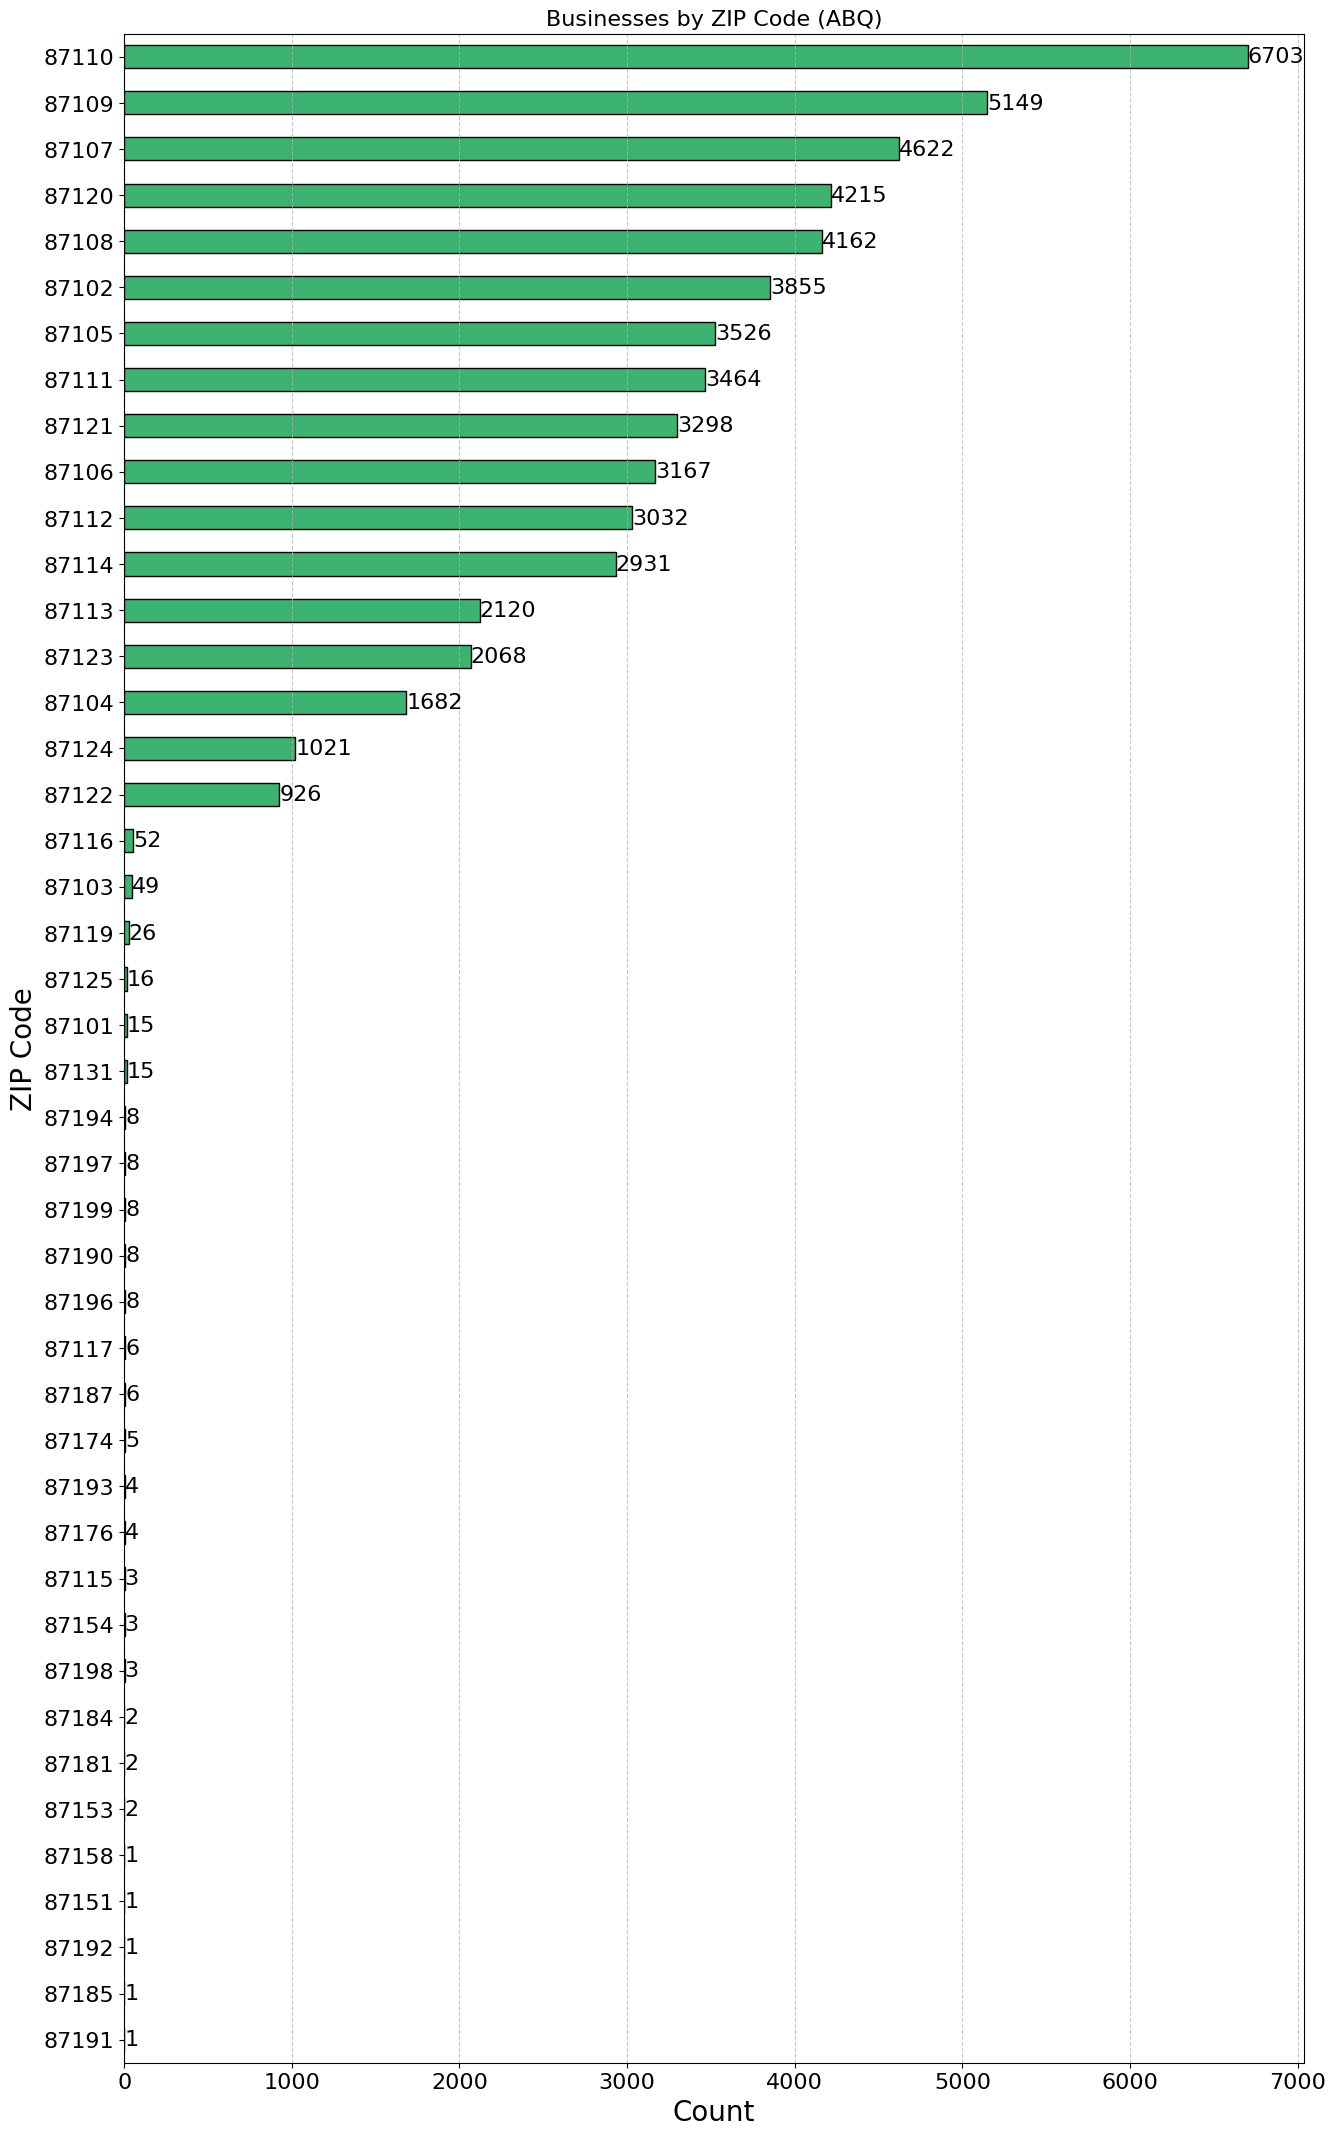

In [50]:
import matplotlib.pyplot as plt

zip_counts = df_clean_ABQ['ZIP'].value_counts()

plt.figure(figsize=(14, max(6, len(zip_counts) * 0.5)))  # Height scales with number of ZIPs
ax = zip_counts.plot(kind='barh', color='mediumseagreen', edgecolor='black')

plt.title('Businesses by ZIP Code (ABQ)', fontsize=16)
plt.xlabel('Count', fontsize=20)
plt.ylabel('ZIP Code', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)  # Smaller font if many ZIPs
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)
plt.gca().invert_yaxis()  # Largest on top

# Add station count labels on bars
for i, v in enumerate(zip_counts):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=16)

plt.show()

plot types of businesses per zip.
chan

* do value counts to compare 'status' and
'effectivestatus' drop 'effectivestatus' is counts are the same.

* plot by year of businesses around.



In [51]:
# Convert 'ORIGNALISSUEDATE' and 'EXPIRATIONDATE' to datetime format.
# 'coerce' will handle any errors by turning problematic entries into NaT (Not a Time).
df_clean_ABQ['ORIGNALISSUEDATE'] = pd.to_datetime(df_clean_ABQ['ORIGNALISSUEDATE'], errors='coerce')
df_clean_ABQ['EXPIRATIONDATE'] = pd.to_datetime(df_clean_ABQ['EXPIRATIONDATE'], errors='coerce')

# It's good practice to drop any rows where the dates could not be converted.
df_clean_ABQ.dropna(subset=['ORIGNALISSUEDATE', 'EXPIRATIONDATE'], inplace=True)

In [52]:
# Calculate the difference between the expiration and issue dates
df_clean_ABQ['Business_Duration_Days'] = (df_clean_ABQ['EXPIRATIONDATE'] - df_clean_ABQ['ORIGNALISSUEDATE']).dt.days

# We'll filter out any negative durations, which could be data entry errors.
df_clean_ABQ = df_clean_ABQ[df_clean_ABQ['Business_Duration_Days'] >= 0]

# Display the new duration column for the first few rows
print(df_clean_ABQ[['LEGALNAME', 'Business_Duration_Days']].head())

                       LEGALNAME  Business_Duration_Days
2                 DAVID B ZAMORA                     365
7                JOSIE ABBENANTE                     364
8   KEVIN KING HANDYMAN SERVICES                     365
9                 MARNA MARTINEZ                     379
10               LUNA LANDSCAPES                    3694


In [53]:
# Ensure the 'Year' column exists from our previous steps
df_clean_ABQ['Year'] = df_clean_ABQ['ORIGNALISSUEDATE'].dt.year

# Group by year and calculate the mean (average) duration in days
avg_duration_per_year = df_clean_ABQ.groupby('Year')['Business_Duration_Days'].mean().reset_index()

# Display the resulting data
print(avg_duration_per_year.head())

   Year  Business_Duration_Days
0  1951                 22220.0
1  1953                 23070.0
2  1958                 22369.0
3  1965                 17913.0
4  1966                 19419.0


/tmp/ipython-input-3002652576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_ABQ['Year'] = df_clean_ABQ['ORIGNALISSUEDATE'].dt.year


In [55]:
# Import plotly.express, which is needed for creating the plot
import plotly.express as px

# Create an interactive line chart showing the average business duration per year
fig_duration = px.line(
    avg_duration_per_year,
    x='Year',
    y='Business_Duration_Days',
    title='Average Business Registration Duration by Start Year',
    labels={'Business_Duration_Days': 'Average Duration (Days)', 'Year': 'Year'},
    markers=True
)

# Show the plot
fig_duration.show()

In [56]:
# Select the specified columns to create a new, smaller DataFrame
df_clean_subset = df_clean_ABQ[['STATUS', 'EFFECTIVESTATUS', 'ZIP_Cleaned']].copy()

# Display the first 10 rows of the new DataFrame to confirm it's correct
print(df_clean_subset.head(10))

     STATUS EFFECTIVESTATUS ZIP_Cleaned
2   EXPIRED         Expired       87120
7    CLOSED          Closed       87104
8    ACTIVE          Active       87109
9    CLOSED          Closed       87108
10  EXPIRED         Expired       87124
11   CLOSED          Closed       87110
12   CLOSED          Closed       87110
13   ACTIVE          Active       87109
14   CLOSED          Closed       87110
15   CLOSED          Closed       87121


## Processing



In [57]:
# Group by Year and ZIP Code, then count the number of businesses
businesses_per_zip_year = df_clean_ABQ.groupby(['Year', 'ZIP_Cleaned']).size().reset_index(name='Business_Count')

# Display the first few rows of this new DataFrame
print(businesses_per_zip_year.head())

   Year ZIP_Cleaned  Business_Count
0  1951       87109               1
1  1953       87104               1
2  1958       87107               1
3  1965       87110               1
4  1966       87105               1


In [58]:
# Find the top 10 ZIP codes with the most businesses in total
top_10_zips = df_clean_ABQ['ZIP_Cleaned'].value_counts().nlargest(10).index

# Filter our yearly data to only include these top 10 ZIP codes
top_zips_data = businesses_per_zip_year[businesses_per_zip_year['ZIP_Cleaned'].isin(top_10_zips)]

In [59]:
# Create the interactive line chart for the top 10 ZIP codes
fig_zip_trends = px.line(
    top_zips_data,
    x='Year',
    y='Business_Count',
    color='ZIP_Cleaned',  # Each line will represent a different ZIP code
    title='Yearly New Business Registrations for Top 10 ZIP Codes in Albuquerque',
    labels={'Business_Count': 'Number of New Businesses', 'ZIP_Cleaned': 'ZIP Code'},
    markers=True
)

# Show the plot
fig_zip_trends.show()

In [ ]:
# Import the LinearRegression model and numpy
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# This assumes 'top_zips_data' and 'top_10_zips' exist from the previous step

# Create a list to hold all our prediction DataFrames
all_predictions = []

# Define the future years we want to predict
future_years = np.array(range(2025, 2028)).reshape(-1, 1)

# Loop through each of the top 10 ZIP codes
for zip_code in top_10_zips:
    # Get the historical data for the current ZIP code
    zip_data = top_zips_data[top_zips_data['ZIP_Cleaned'] == zip_code]

    # Set up the features (Year) and target (Business_Count)
    X = zip_data[['Year']]
    y = zip_data['Business_Count']

    # Create and train a new model for this ZIP code
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions for the future years
    predicted_counts = model.predict(future_years)

    # Create a DataFrame with the predictions
    prediction_df = pd.DataFrame({
        'Year': future_years.flatten(),
        'Business_Count': predicted_counts,
        'ZIP_Cleaned': zip_code  # Label the predictions with the correct ZIP
    })

    # Add the results to our list
    all_predictions.append(prediction_df)

# Combine all prediction DataFrames into one
predictions_df = pd.concat(all_predictions)

print("Predictions generated for top 10 ZIP codes until 2027.")
print(predictions_df.head())

## Data Visualization/Communication of Results
